### Peace Choi's analysis of Titanic data: 

I imported following Python libraries: NumPy, Pandas, Matplotlib.pyplot, and Seaborn. I imported a titanic csv file and made a Pandas DataFrame. I cleaned the data by removing unnecessary columns, correcting name of a misspelled column, and replacing NA values in all columns with the mean value of the corresponding column, as appropriate.  

Most of the passengers were in 20s and 30s, and in the age group there were about 250 males and 100 females. Both male and female passengers had a similar trend to their cost of fares; negatively skewed graphs confirmed the vast majority of passengers paid 50 or less. The survival rate of males is 13% while that of females is 50%; females had a higher survive rate than males. 

For the rate of passengers per class and their survival rates by the class, the 3rd class had the majority of passengers of 54% while the 1st and 2nd class had about the same percentage of passengers, 25% and 21%, respectively. The passengers' survival rates had a strong positive correlation with the passengers' class; the passengers in the first class had the highest survival rates of $42% versus the passengers in the second class had the next highest survival rates of 31%, while the passengers in the third class had the lowest survival rates of 17%.

People who were accompanied by their parents and/or siblings had higher survival rates than people who were alone (34% vs. 20%).

~94% of passengers purchased cheapest fares under 100; ~4% purchased fares between 100 to 200; ~2% purchased fares between 200 to 300; and less than 1% purchased the most expensive fares costing over 500.   

There is no correlation between the fares and ports. There is no correlation between the people who are travelling alone and the passengers' class. To find survival rates by both the gender and the age, I first categorized passengers' age as following: older than or equal to 65 as old, between 25 years and 65 as middle age, younger than 25 as young. The middle age female group had the most number of survivors, 148, while the old female group had the least number of survivors, 0. The minimum age of the passengers was less than a year old, the oldest age was 80, and the average age was 30.



In [ ]:

#Import libraries and apply pandas dataframe to the data
import numpy as npz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train_and_test2.csv') 

#Quick glance of the data
print (df.info()) 
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

## Source of Tiantic.csv: [kaggle](https://www.kaggle.com/datasets?search=titanic)

Creator of the titantic.csv file: Khashayar Baghizadeh Hosseini

## Data cleaning: 
Remove multiple uncessary columns:
1. Remove columns with name 'zero' in it because they contain 0s. 
2. Change name of column '2urvived' to 'Survived'
3. Check for null or NaN values in columns. Either ignore, drop, or replace those. 

In [ ]:
#1. Remove columns with name 'zero' in it:
zero_columns = [col for col in df.columns if 'zero' in col] #list of columns w/ 'zero'
df.drop(columns = zero_columns, inplace = True) #drop the list of columns named 'zero' 
assert 'zero' not in df.columns, 'There are still columns named zero' 

#2. Change name of column '2urvived' to 'Survived'
df.rename(columns = {'2urvived':'Survived'}, inplace = True) #rename the column
assert '2urvived' not in df.columns, 'There is still a column named 2urvived'
assert 'Survived' in df.columns, 'There is a column named survived' 

#3. Check for null or NaN values in columns. Either ignore, drop, or replace those.
df.Embarked.fillna(2,inplace=True) #replace NaN in Embarked column with 2
assert df.Embarked.isnull().sum()==0, 'There is still NaN in column Embarked'

Question 1: What is the number of passengers by age and sex? Is there a majority population group of passengers by age and sex, if any? 

Answer: Most of the passengers were in between 20s and 30s, and in that age group there were about 250 males and 100 females.  

<AxesSubplot: xlabel='Age', ylabel='Count'>

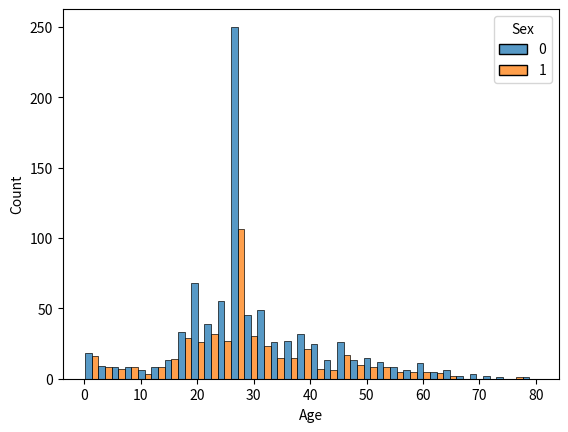

In [ ]:
#Get count of passengers' age broken by sex. 
#Use sns.pairplot to get a quick graphs of 'Age' as x and 'Sex' as hue
sns.histplot(data=df, x='Age', hue='Sex', multiple='dodge')

Question 2: What is the fare distribution by sex?

Answer: Both male and female passengers had a simliar trend to their cost of fares; negatively skewed graphs below confirm the vast majority of passengers paid 50 or less.


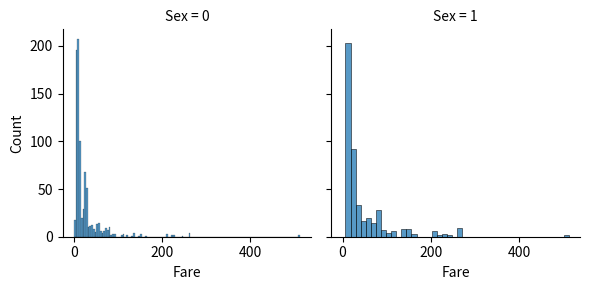

In [ ]:
#sns.histplot(data=df, x='Age', hue='Sex')
g = sns.FacetGrid(df, col='Sex') 
g.map(sns.histplot,'Fare')  

Question 3: What is the survival rate by gender?

Answer: The survival rate of males is 13% while that of females is 50%. Females had a higher survivate rate than males.

Male survival rate: 0.12930011862396204


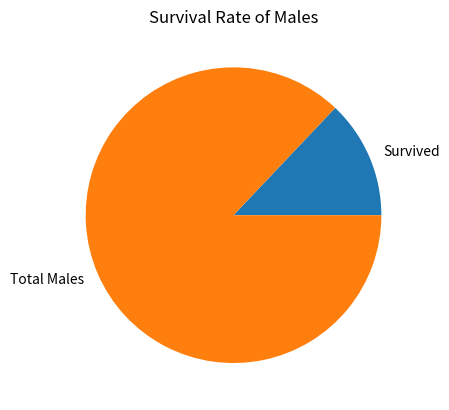

Female survial rate: 0.5


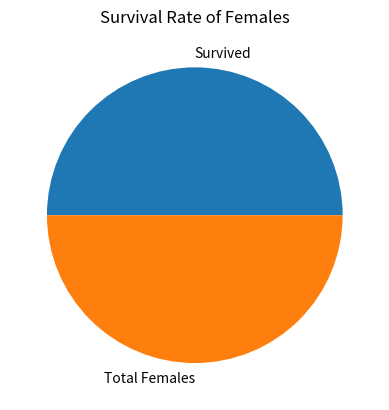

In [ ]:
#male 
total_male_survived = df[(df['Sex']==0) & (df['Survived']==1)].shape[0]
total_male = df[df['Sex']==0].shape[0]
sur_rate_male = total_male_survived/total_male
pie_data_male=[sur_rate_male,1-sur_rate_male]
pie_data_male_key=['Survived','Total Males']
plt.title("Survival Rate of Males")
print (f"Male survival rate: {sur_rate_male}")
plt.pie(pie_data_male, labels=pie_data_male_key)
plt.show()

#female
total_fem_survived = df[(df['Sex']==1) & (df['Survived']==1)].shape[0]
total_fem = df[df['Sex']==1].shape[0]
sur_rate_female = total_fem_survived/total_fem
pie_data_female=[sur_rate_female, 1-sur_rate_female]
pie_data_female_key=['Survived','Total Females']
plt.title('Survival Rate of Females')
print (f"Female survial rate: {sur_rate_female}")
plt.pie(pie_data_female, labels=pie_data_female_key)
plt.show()

Question 4: What was the rate of passengers per class and the passengers' survival rates by the class?

Answer: For the rate of passengers per class and their survival rates by the class, the 3rd class had the majority of passengers of 54% while the 1st and 2nd class had about the same percentage of passengers, 25% and 21%, respectively. The passengers' survival rates had a strong positive correlation with the passengers' class; the passengers in the first class had the highest survival rates of $42% versus the passengers in the second class had the next highest survival rates of 31%, while the passengers in the third class had the lowest survival rates of 17%.


In [ ]:
print(df.Pclass.value_counts())
print(df.Pclass.value_counts(normalize=True))
print (df.groupby('Pclass').sum()['Survived'])
sur_rate_1st=136/323
sur_rate_2nd=87/277
sur_rate_3rd=119/709
x=[sur_rate_1st, sur_rate_2nd, sur_rate_3rd]
y=df.Pclass
df_sur_rate = pd.DataFrame({sur_rate_1st, sur_rate_2nd, sur_rate_3rd}, index=['1st','2nd','3rd'])
print(df.groupby('Pclass').mean()['Survived'])

3    709
1    323
2    277
Name: Pclass, dtype: int64
3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.421053
2    0.314079
3    0.167842
Name: Survived, dtype: float64


Question 5: Were people who were alone more likely to survive than people who were accompanied by their parents and/or siblings?

Answer: People who were accompanied by their parents and/or siblings had higher survival rates than people who were alone (34% vs. 20%). 

In [ ]:
df['isAlone']=((df['Parch']+df['sibsp'])==0).astype(int).astype(str)
# print(df['isAlone'])
print (df.groupby('isAlone').mean()['Survived'])

isAlone
0    0.344894
1    0.206329
Name: Survived, dtype: float64


Question 6: What was the fare distribution? 

Answer: Almost all the passengers purchased the cheapest fare. 

Question 7: Divide fare distrubiton by price ranges. 

Answer: ~94% of passengers purchased cheapest fares under 100; ~4% purchased fares between 100 to 200; ~2% purchased fares between 200 to 300; and less than 1% purchased the most expensive fares costing over 500.    

In [ ]:
#Feature Engineering: creating more new useful features than already existing features 
#how to use .apply
def func(inp):
    if 0<=inp<=100:
        return 'under 100'
    elif 100<inp<=200:
        return '100 to 200'
    elif 200<inp<=300:
        return '200 to 300'
    elif 300<inp<=400:
        return '300 to 400'
    elif 400<inp<=500:
        return '400 to 500'
    else:
        return 'Over 500'

df['Fare_buckets']=df['Fare'].apply(func)
print(df['Fare_buckets'].value_counts(normalize=True))        

under 100     0.935829
100 to 200    0.035141
200 to 300    0.025974
Over 500      0.003056
Name: Fare_buckets, dtype: float64


Question 8: Are there any coorelation between the two variables? 

Answer: There is no correlation between the fares and ports. 

In [ ]:
#fare distribution by port and interpretation
print(df.columns)
print (df.groupby(['Fare_buckets','Embarked']).mean()['Fare'])

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived', 'isAlone', 'Fare_buckets'],
      dtype='object')
Fare_buckets  Embarked
100 to 200    0.0         123.917458
              2.0         145.604380
200 to 300    0.0         238.715620
              2.0         236.461914
Over 500      0.0         512.329200
under 100     0.0          30.842314
              1.0          12.409012
              2.0          21.525268
Name: Fare, dtype: float64


Question 9: Were people who are travelling alone more likely to be in a certain class compare to those travelling with family? 

Answer: There is no correlation between the people who are travelling alone and the passengers' class.  

In [ ]:
#Were people traveling alone more likely to be in a certain class compared to those traveling with family?
#print (df.groupby(['Pclass', 'isAlone'].sum()['Survived'].shape(0))
# print (df.groupby(['Pclass','isAlone']).count())
print (df.groupby(['isAlone'])['Pclass'].value_counts())

isAlone  Pclass
0        3         237
         1         163
         2         119
1        3         472
         1         160
         2         158
Name: Pclass, dtype: int64


Question 10: What are the survival rates by  both the gender and the age group (e.g. survival rates of young males vs. survival rates of middle age females)? 

Answer: To find survival rates by both the gender and the age, I first categorized passengers' age as following: older than or equal to 65 as old, between 25 years and 65 as middle age, younger than 25 as young. The middle age female group had the most number of survivors, 148, while the old female group had the least number of survivors, 0. The minimum age of the passengers was less than a year old, the oldest age was 80, and the average age was 30.       

Age_Sex
Middle Age female    148
Middle Age male       75
Old female             0
Old male               1
Young female          85
Young male            33
Name: Survived, dtype: int64


<AxesSubplot: xlabel='Age_Sex', ylabel='Count'>

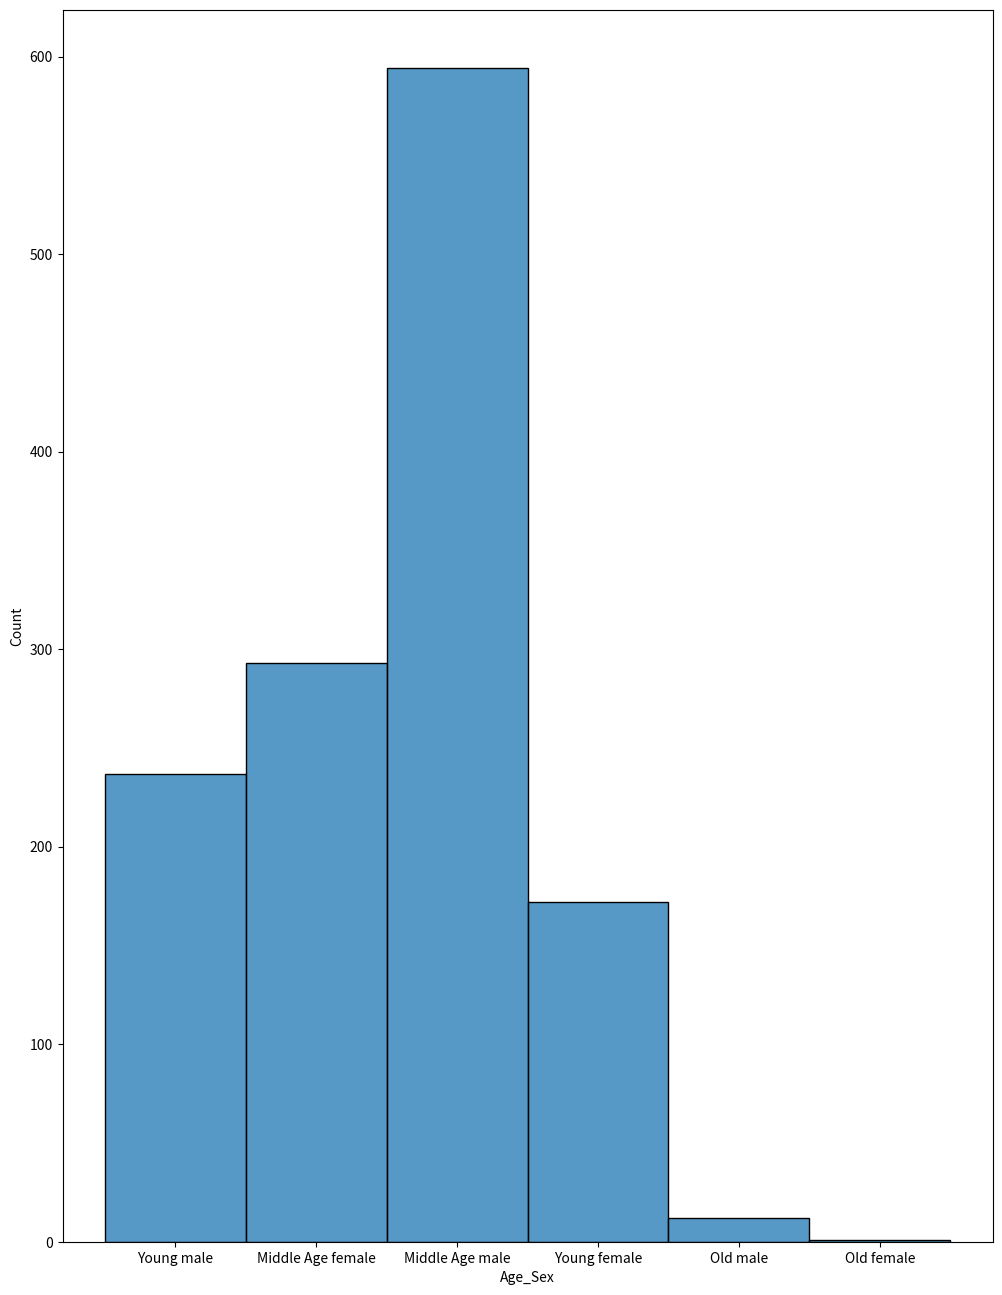

In [ ]:
def age_fun(inp):
    if inp >=65:
        return 'Old'
    elif inp >=25: 
        return 'Middle Age'
    else: 
        return 'Young'
    

def func1(age,gender):
    if gender==1:
        return age_fun(age)+' '+'female'
    else:
        return age_fun(age)+' '+'male'
  
df['Age_Sex'] = df[['Age','Sex']].apply(lambda row: func1(row['Age'],row['Sex']),axis=1) 
print(df.groupby('Age_Sex').sum()['Survived'])
plt.figure(figsize=(12,16))
sns.histplot(data=df,x='Age_Sex')

#print(df['Age_Sex'].value_counts(normalize=True)) #normalize turn it to % 
# print(df['Age_Sex'].value_counts())    
# print(df[(df['Age_Sex']) & (df['Survived']==1)].value_counts())    
    
#lambda is a way to make functions anonymous

#lambda is used as an interface to properly ppass the row arguments to dummyfunc
# print(df[['Age','Sex']].apply(lambda row:dummyfunc(row['Age'],row['Sex'])))


In [ ]:
age_min = df['Age'].min()
age_max = df['Age'].max()
age_mean = df['Age'].mean()
print (f'this is min age {age_min}')
print (f'this is max age {age_max}')
print (f'this is average age {age_mean}')

this is min age 0.17
this is max age 80.0
this is average age 29.50318563789152
